In [1]:
%load_ext autoreload
%autoreload 2

#per la riproducibilità
%env CUBLAS_WORKSPACE_CONFIG=":4096:8"

import os
import itertools
distances = []
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

from multiprocessing import Pool
import time
from tqdm import tqdm
import networkx as nx
from networkx import stochastic_block_model


from graph_generation import GenerateGraph, perturb_nx_graph
from models import GCN, view_parameters, new_parameters, modify_parameters, Inits, new_parameters_linears
from train import Trainer, Dataset
from embedding import Embedding
from config_valid import Config, TrainingMode
import experiments
from experiments import Experiments, experiment_node_embedding, all_seeds
from plot_funcs import (plot_dim1, plot_dimN, plot_correlation_error, plot_metrics, plot_node_emb_1D_perclass,plot_node_emb_nD_perclass, scatter_node_emb, 
                        plot_graph_emb_1D, plot_data_degree_sequence, plot_corr_epoch, plot_ripetizioni_stesso_trial, 
                        plot_onlyloss_ripetizioni_stesso_trial,plot_onlyloss_ripetizioni_stesso_trial_superimposed)
from plot_model import plot_model
from utils import array_wo_outliers, plot_grafo, plot_grafo2
from Inspect import Inspect


import torch
from torch_geometric import nn
from torch_geometric.loader import DataLoader
device = torch.device('cuda')

from scipy import stats
from sklearn.metrics import log_loss

import pickle 
from plt_parameters import init_params, get_colors_to_cycle_rainbow8, get_colors_to_cycle_rainbowN
init_params()
rootsave = Path("output_plots/")

env: CUBLAS_WORKSPACE_CONFIG=":4096:8"


# Studio al variare di p1 che si avvicina a p2

In [6]:
p1 = np.round(np.arange(0.05,0.25, 0.005), 3)
ps = list(zip(p1, [0.3]*len(p1)))
ps

[(0.05, 0.3),
 (0.055, 0.3),
 (0.06, 0.3),
 (0.065, 0.3),
 (0.07, 0.3),
 (0.075, 0.3),
 (0.08, 0.3),
 (0.085, 0.3),
 (0.09, 0.3),
 (0.095, 0.3),
 (0.1, 0.3),
 (0.105, 0.3),
 (0.11, 0.3),
 (0.115, 0.3),
 (0.12, 0.3),
 (0.125, 0.3),
 (0.13, 0.3),
 (0.135, 0.3),
 (0.14, 0.3),
 (0.145, 0.3),
 (0.15, 0.3),
 (0.155, 0.3),
 (0.16, 0.3),
 (0.165, 0.3),
 (0.17, 0.3),
 (0.175, 0.3),
 (0.18, 0.3),
 (0.185, 0.3),
 (0.19, 0.3),
 (0.195, 0.3),
 (0.2, 0.3),
 (0.205, 0.3),
 (0.21, 0.3),
 (0.215, 0.3),
 (0.22, 0.3),
 (0.225, 0.3),
 (0.23, 0.3),
 (0.235, 0.3),
 (0.24, 0.3),
 (0.245, 0.3)]

In [4]:
config_file = "configurations/ER_embed_perturb.yml"
diz_trials = {'graph_dataset.list_p': ps}
             #'model.init_weights': ['orthogonal']*5 + ['eye']*5}

xp = Experiments(config_file, diz_trials, rootsave)

0 configurazioni saltate su 40, farò 40 training


/home/daniele/Documenti/Progetti/Networks/Embednet/GridConfigurations.py:70: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_cum = df_cum.reset_index().drop(columns=['index'])


In [5]:
xp.GS_same_weight_inits_different_datasets()

Run 1/40
Generating dataset...
Mean connectivity for each node: 9.955 p=0.05
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 33.79it/s]


Tempo impiegato: 5.942284822463989


 58%|████████████████████████████████████████████████████▊                                      | 5802/10000 [04:08<02:59, 23.37it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 2/40
Generating dataset...
Mean connectivity for each node: 10.949 p=0.055
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.24it/s]


Tempo impiegato: 6.227757692337036


 60%|██████████████████████████████████████████████████████▎                                    | 5968/10000 [04:10<02:49, 23.85it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 3/40
Generating dataset...
Mean connectivity for each node: 11.938 p=0.06
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 31.13it/s]


Tempo impiegato: 6.444726228713989


 60%|██████████████████████████████████████████████████████▏                                    | 5953/10000 [04:12<02:51, 23.61it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 4/40
Generating dataset...
Mean connectivity for each node: 12.946 p=0.065
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.03it/s]


Tempo impiegato: 6.264169454574585


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:12<00:00, 23.11it/s]


test accuracy finale: 1.0
Run 5/40
Generating dataset...
Mean connectivity for each node: 13.944 p=0.07
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 28.66it/s]


Tempo impiegato: 6.998492002487183


 63%|█████████████████████████████████████████████████████████▍                                 | 6314/10000 [04:35<02:40, 22.91it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 6/40
Generating dataset...
Mean connectivity for each node: 14.963 p=0.075
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 30.83it/s]


Tempo impiegato: 6.507342576980591


 60%|██████████████████████████████████████████████████████▎                                    | 5973/10000 [04:21<02:56, 22.86it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 7/40
Generating dataset...
Mean connectivity for each node: 15.969 p=0.08
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 30.02it/s]


Tempo impiegato: 6.682832717895508


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:22<00:00, 22.58it/s]


test accuracy finale: 1.0
Run 8/40
Generating dataset...
Mean connectivity for each node: 16.956 p=0.085
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 29.43it/s]


Tempo impiegato: 6.815033197402954


 60%|██████████████████████████████████████████████████████▌                                    | 5996/10000 [04:50<03:13, 20.66it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 9/40
Generating dataset...
Mean connectivity for each node: 17.93 p=0.09
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 28.83it/s]


Tempo impiegato: 6.9569761753082275


 72%|█████████████████████████████████████████████████████████████████▉                         | 7242/10000 [05:22<02:02, 22.47it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 10/40
Generating dataset...
Mean connectivity for each node: 18.911 p=0.095
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.75it/s]


Tempo impiegato: 6.126896381378174


 60%|██████████████████████████████████████████████████████▊                                    | 6019/10000 [04:55<03:15, 20.35it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 11/40
Generating dataset...
Mean connectivity for each node: 19.923 p=0.1
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 32.16it/s]


Tempo impiegato: 6.238737106323242


 67%|█████████████████████████████████████████████████████████████▏                             | 6724/10000 [05:06<02:29, 21.95it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 12/40
Generating dataset...
Mean connectivity for each node: 20.918 p=0.105
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 31.49it/s]


Tempo impiegato: 6.376527547836304


 60%|███████████████████████████████████████████████████████                                    | 6046/10000 [05:03<03:18, 19.90it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 13/40
Generating dataset...
Mean connectivity for each node: 21.905 p=0.11
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 30.99it/s]


Tempo impiegato: 6.47838830947876


 60%|███████████████████████████████████████████████████████                                    | 6044/10000 [05:04<03:19, 19.82it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 14/40
Generating dataset...
Mean connectivity for each node: 22.895 p=0.115
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 30.71it/s]


Tempo impiegato: 6.533085584640503


 56%|██████████████████████████████████████████████████▉                                        | 5596/10000 [04:17<03:22, 21.72it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 15/40
Generating dataset...
Mean connectivity for each node: 23.88 p=0.12
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 25.14it/s]


Tempo impiegato: 7.981405973434448


 56%|██████████████████████████████████████████████████▊                                        | 5578/10000 [04:17<03:24, 21.67it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 16/40
Generating dataset...
Mean connectivity for each node: 24.875 p=0.125
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 24.71it/s]


Tempo impiegato: 8.116952180862427


 63%|█████████████████████████████████████████████████████████▌                                 | 6319/10000 [04:49<02:48, 21.80it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 17/40
Generating dataset...
Mean connectivity for each node: 25.879 p=0.13
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 30.36it/s]


Tempo impiegato: 6.609982252120972


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:40<00:00, 21.72it/s]


test accuracy finale: 1.0
Run 18/40
Generating dataset...
Mean connectivity for each node: 26.878 p=0.135
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 23.91it/s]


Tempo impiegato: 8.386391639709473


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:43<00:00, 21.60it/s]


test accuracy finale: 1.0
Run 19/40
Generating dataset...
Mean connectivity for each node: 27.868 p=0.14
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 29.13it/s]


Tempo impiegato: 6.886502265930176


 64%|██████████████████████████████████████████████████████████▋                                | 6445/10000 [05:00<02:45, 21.48it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 20/40
Generating dataset...
Mean connectivity for each node: 28.859 p=0.145
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 22.76it/s]


Tempo impiegato: 8.807751417160034


 65%|███████████████████████████████████████████████████████████▍                               | 6529/10000 [05:01<02:40, 21.69it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 21/40
Generating dataset...
Mean connectivity for each node: 29.855 p=0.15
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 28.83it/s]


Tempo impiegato: 6.959412336349487


 52%|██████████████████████████████████████████████▉                                            | 5152/10000 [03:59<03:45, 21.54it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 22/40
Generating dataset...
Mean connectivity for each node: 30.843 p=0.155
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 21.74it/s]


Tempo impiegato: 9.221991777420044


 59%|█████████████████████████████████████████████████████▋                                     | 5903/10000 [04:47<03:19, 20.53it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 23/40
Generating dataset...
Mean connectivity for each node: 31.846 p=0.16
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 28.16it/s]


Tempo impiegato: 7.1228907108306885


 58%|████████████████████████████████████████████████████▍                                      | 5768/10000 [04:29<03:17, 21.43it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 24/40
Generating dataset...
Mean connectivity for each node: 32.848 p=0.165
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 21.19it/s]


Tempo impiegato: 9.459204196929932


 57%|███████████████████████████████████████████████████▌                                       | 5673/10000 [04:24<03:21, 21.44it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 25/40
Generating dataset...
Mean connectivity for each node: 33.834 p=0.17
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 27.42it/s]


Tempo impiegato: 7.31850790977478


 59%|█████████████████████████████████████████████████████▉                                     | 5933/10000 [04:37<03:10, 21.36it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 26/40
Generating dataset...
Mean connectivity for each node: 34.836 p=0.175
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:09<00:00, 20.59it/s]


Tempo impiegato: 9.736687898635864


 57%|███████████████████████████████████████████████████▌                                       | 5664/10000 [04:51<03:43, 19.44it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 27/40
Generating dataset...
Mean connectivity for each node: 35.844 p=0.18
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 27.06it/s]


Tempo impiegato: 7.414637565612793


 52%|███████████████████████████████████████████████                                            | 5173/10000 [04:07<03:50, 20.94it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 28/40
Generating dataset...
Mean connectivity for each node: 36.842 p=0.185
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 19.97it/s]


Tempo impiegato: 10.040434837341309


 53%|████████████████████████████████████████████████▋                                          | 5344/10000 [04:20<03:46, 20.54it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 29/40
Generating dataset...
Mean connectivity for each node: 37.852 p=0.19
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 26.35it/s]


Tempo impiegato: 7.611867189407349


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:52<00:00, 21.18it/s]


test accuracy finale: 1.0
Run 30/40
Generating dataset...
Mean connectivity for each node: 38.861 p=0.195
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 26.14it/s]


Tempo impiegato: 7.672439813613892


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:53<00:00, 21.12it/s]


test accuracy finale: 1.0
Run 31/40
Generating dataset...
Mean connectivity for each node: 39.864 p=0.2
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 18.69it/s]


Tempo impiegato: 10.720561981201172


 53%|████████████████████████████████████████████████▍                                          | 5323/10000 [04:14<03:43, 20.88it/s]


Early stopping!!!
test accuracy finale: 1.0
Run 32/40
Generating dataset...
Mean connectivity for each node: 40.858 p=0.205
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 25.49it/s]


Tempo impiegato: 7.866698503494263


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:58<00:00, 20.88it/s]


test accuracy finale: 1.0
Run 33/40
Generating dataset...
Mean connectivity for each node: 41.854 p=0.21
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:07<00:00, 25.38it/s]


Tempo impiegato: 7.902377367019653


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:57<00:00, 20.95it/s]


test accuracy finale: 1.0
Run 34/40
Generating dataset...
Mean connectivity for each node: 42.831 p=0.215
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 17.73it/s]


Tempo impiegato: 11.304926633834839


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [07:59<00:00, 20.84it/s]


test accuracy finale: 0.9833333333333333
Run 35/40
Generating dataset...
Mean connectivity for each node: 43.845 p=0.22
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 24.83it/s]


Tempo impiegato: 8.081071853637695


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:00<00:00, 20.81it/s]


test accuracy finale: 0.5666666666666667
Run 36/40
Generating dataset...
Mean connectivity for each node: 44.831 p=0.225
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 25.00it/s]


Tempo impiegato: 8.024536609649658


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:03<00:00, 20.70it/s]


test accuracy finale: 0.55
Run 37/40
Generating dataset...
Mean connectivity for each node: 45.835 p=0.23
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:11<00:00, 16.87it/s]


Tempo impiegato: 11.884121656417847


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:07<00:00, 20.51it/s]


test accuracy finale: 0.55
Run 38/40
Generating dataset...
Mean connectivity for each node: 46.851 p=0.235
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 24.39it/s]


Tempo impiegato: 8.230919361114502


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:05<00:00, 20.59it/s]


test accuracy finale: 0.45
Run 39/40
Generating dataset...
Mean connectivity for each node: 47.815 p=0.24
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:08<00:00, 24.14it/s]


Tempo impiegato: 8.309110403060913


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:05<00:00, 20.61it/s]


test accuracy finale: 0.45
Run 40/40
Generating dataset...
Mean connectivity for each node: 48.806 p=0.245
Mean connectivity for each node: 59.707 p=0.3
Dataset generated
Loading Dataset...


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [00:12<00:00, 16.24it/s]


Tempo impiegato: 12.34182858467102


100%|██████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [08:09<00:00, 20.45it/s]

test accuracy finale: 0.55


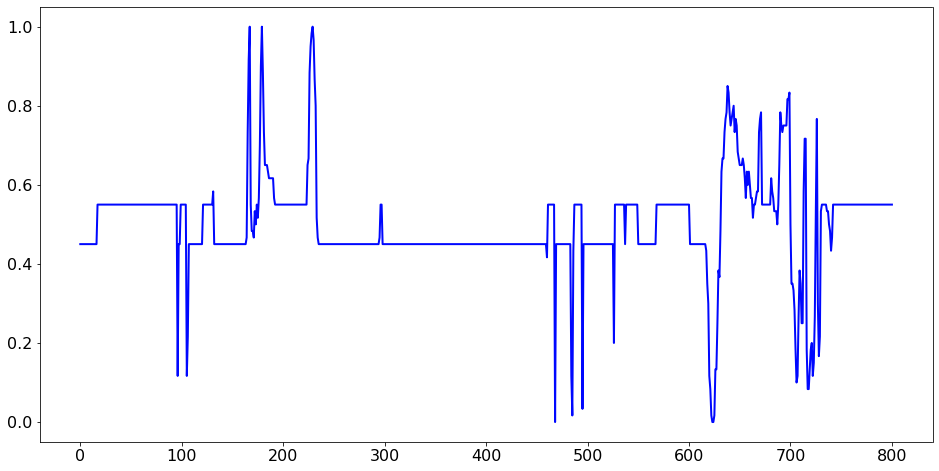

In [28]:
plt.plot(xp.gc.config_dataframe['risultati']['test_accuracy'][33])

In [7]:
with open('results_df_20gen23_2.pkl', 'wb') as file:
    pickle.dump(xp.gc.config_dataframe, file, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
df = pd.read_pickle('results_df_20gen23.pkl')

In [12]:
df = xp.gc.config_dataframe

In [132]:
num_emb_neurons = xp.trainer.model.convs[-1].out_channels
train_mode = xp.trainer.config_class.modo

### calcoli per overlap

In [105]:
embs = df['risultati']['embedding_class']
for emb in embs:
    emb.get_metrics(num_emb_neurons, xp.trainer.config_class.modo)

In [33]:
probs = []
distances = []
for i, row in df.iterrows():
    p1 = row['graph_dataset']['list_p'][0]
    probs.append(p1)
    emb = row['risultati']['embedding_class']
    emb.get_metrics(num_emb_neurons, xp.trainer.config_class.modo)
    dist = emb.difference_of_means
    distances.append(dist)

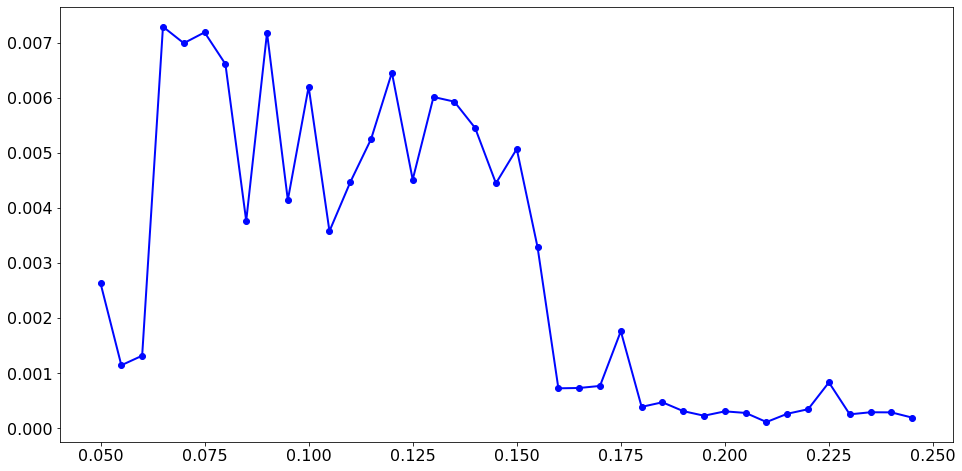

In [41]:
plt.plot(probs, distances,  marker='o')#, linestyle='None')#, markerwidth=5)

In [46]:
mu, std = norm.fit(df['risultati']['embedding_class'][35].inter_dists)

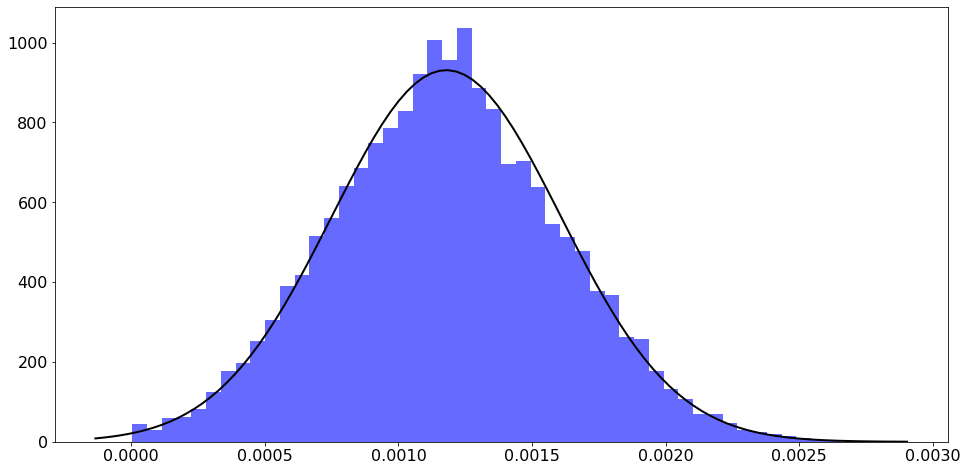

In [49]:
plt.hist(df['risultati']['embedding_class'][35].inter_dists, bins=50, density=True, alpha=0.6);
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

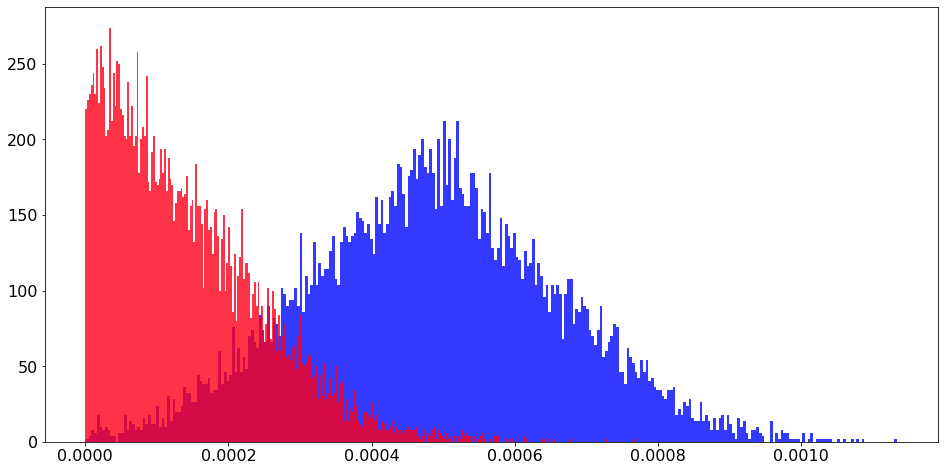

In [19]:
fig, axes = plt.subplots(xp.gc.config_dataframe.shape[0], 1)
plot_metrics(df['risultati']['embedding_class'][35], 2, 'mode1')

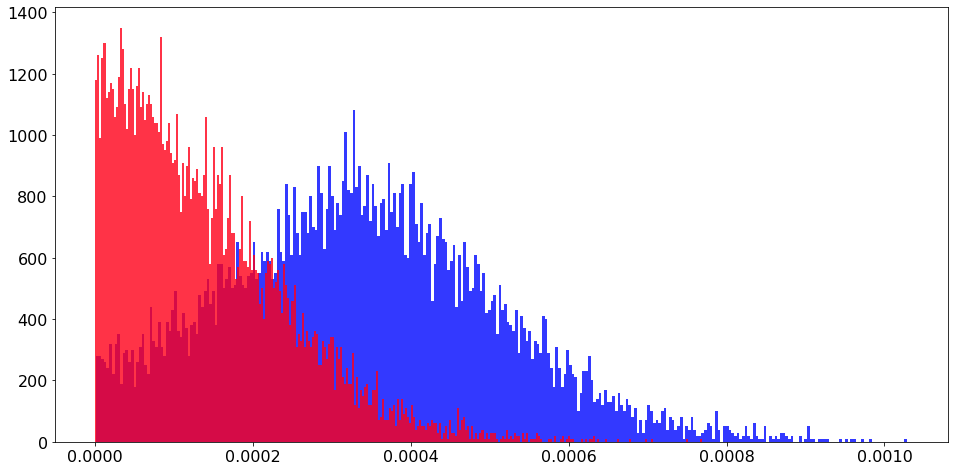

In [157]:
plot_metrics(df['risultati']['embedding_class'][39], 2, 'mode1')

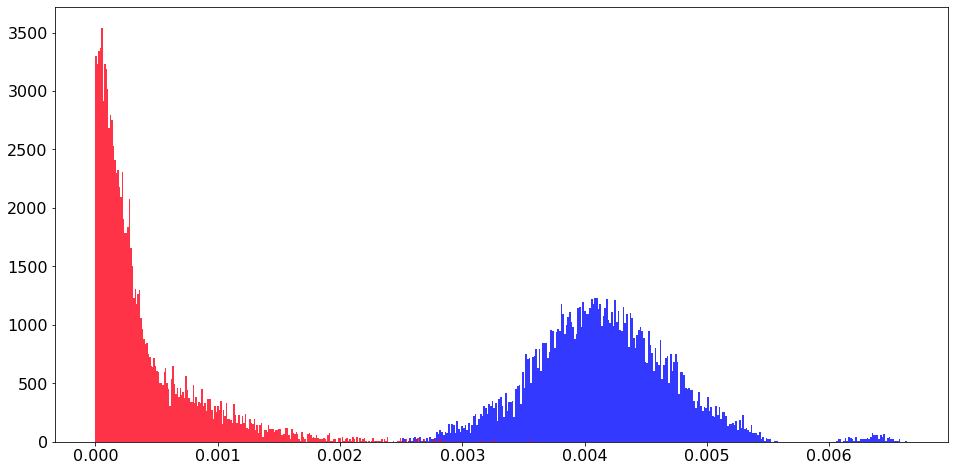

In [162]:
plot_metrics(df['risultati']['embedding_class'][7], 2, 'mode1')

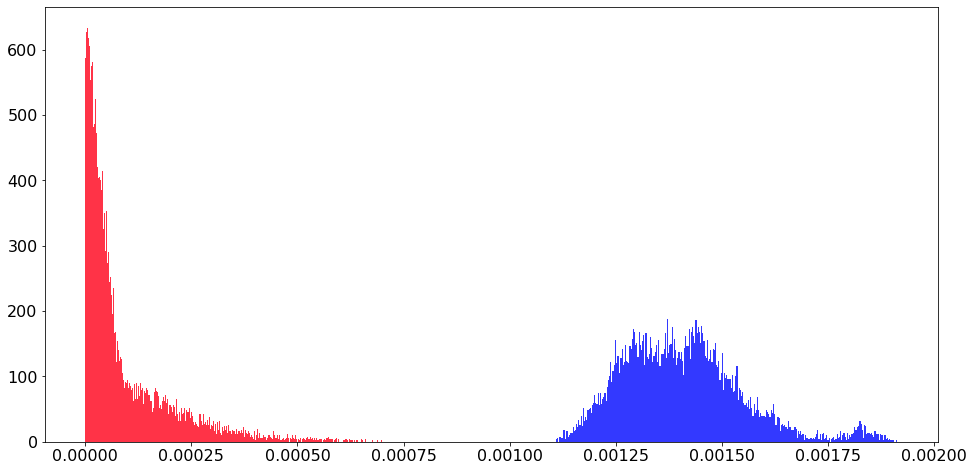

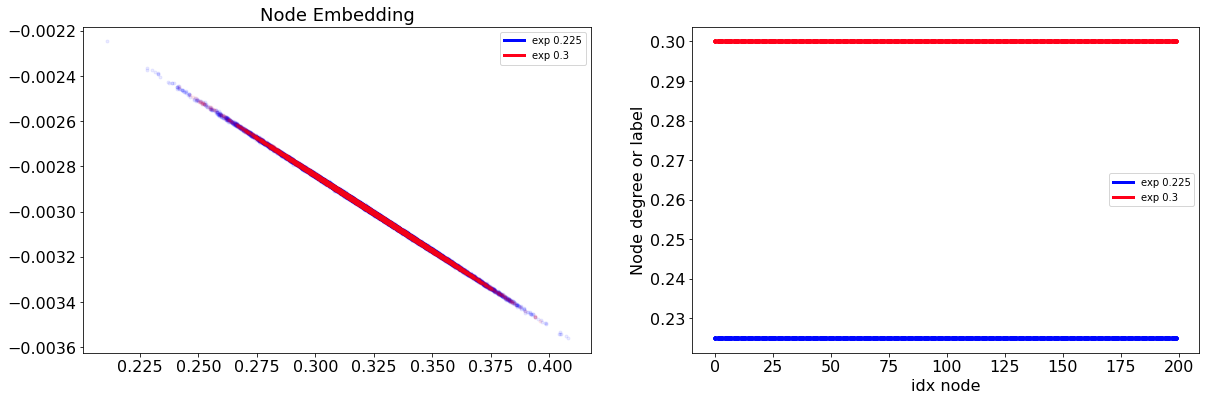

In [18]:
plot_node_emb_nD_perclass(df['risultati']['embedding_class'][35].emb_perclass)

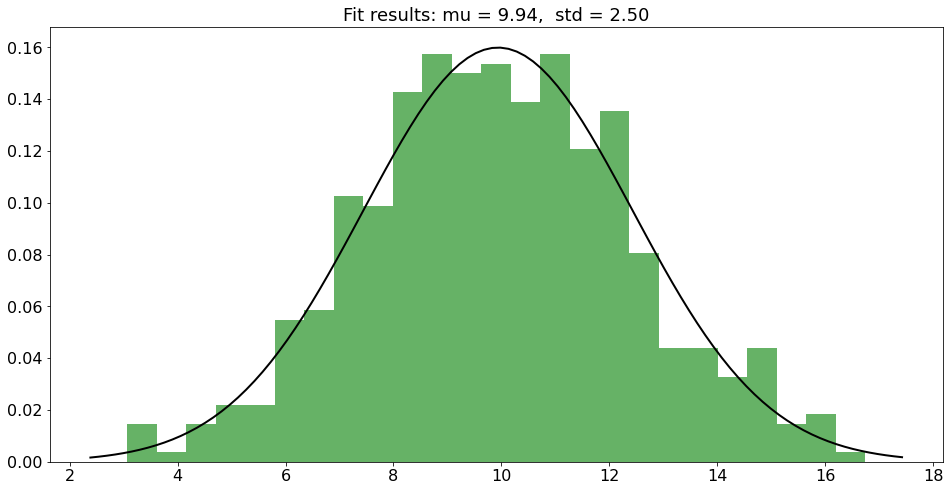

In [42]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [50]:
# provo misurando l'overlap tra le due distribuzioni

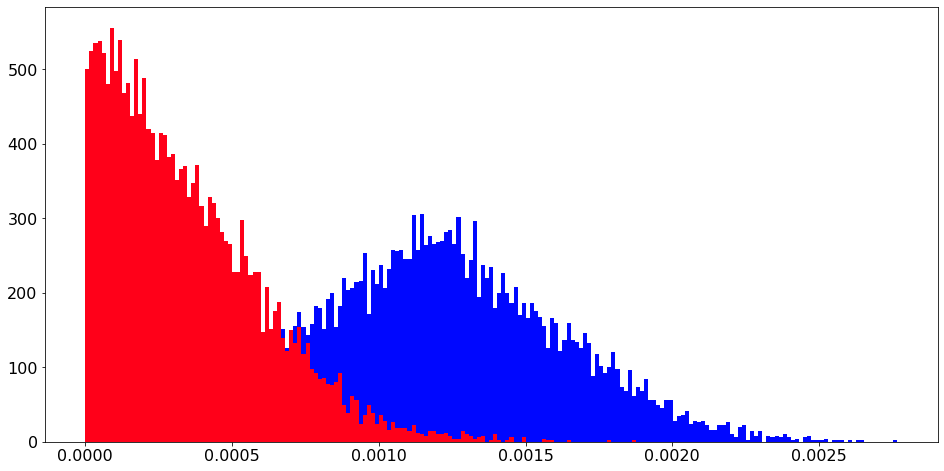

In [69]:
values1, bins1, plot1 = plt.hist(df['risultati']['embedding_class'][35].inter_dists, bins=bins)
values2, bins2, plot2 = plt.hist(df['risultati']['embedding_class'][35].intra_dists, bins=bins)

<BarContainer object of 199 artists>

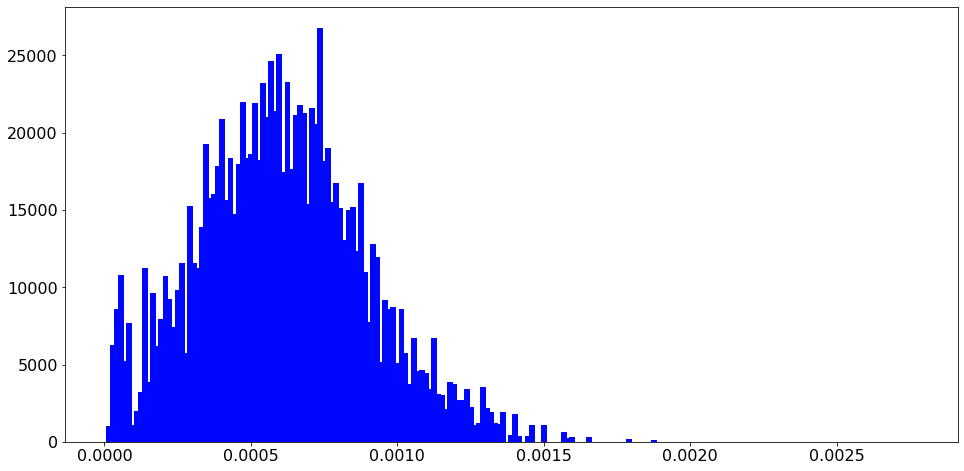

In [94]:
plt.bar(bins[1:], values1*values2, width=0.00002)

### Risultati

In [130]:
def calc_overlap(inter_dists, intra_dists):
    massimo = max(inter_dists)
    bins = np.linspace(0, massimo, 200)
    v1, b = np.histogram(inter_dists, bins=bins)
    v2, b = np.histogram(intra_dists, bins=bins)
    overlap_product = (v1*v2).sum()
    norm = (v1*v1 +v2*v2).sum()
    return overlap_product/norm

calc_overlap(df['risultati']['embedding_class'][35].inter_dists, df['risultati']['embedding_class'][35].intra_dists)

107.27247670016479

In [134]:
probs = []
distances = []
overlaps = []
for i, row in df.iterrows():
    p1 = row['graph_dataset']['list_p'][0]
    probs.append(p1)
    emb = row['risultati']['embedding_class']
    emb.get_metrics(num_emb_neurons, train_mode)
    dist = emb.difference_of_means
    distances.append(dist)
    overlaps.append(emb.overlap)

In [ ]:
def func(i, row):
    p1 = row['graph_dataset']['list_p'][0]
    emb = row['risultati']['embedding_class']
    emb.get_metrics(num_emb_neurons, train_mode)
    return i, probs, emb.difference_of_means, emb.overlap
    
with Pool(processes=32) as pool:
    results = [pool.apply_async(func, [i, row]) for i, row in df.iterrows()]
    for result in results:
        i, probs, dist, overlap = result.get()
        df.loc[i, 'Distanza_medie'] = dist
        df.loc[i, 'Overlap'] = overlap

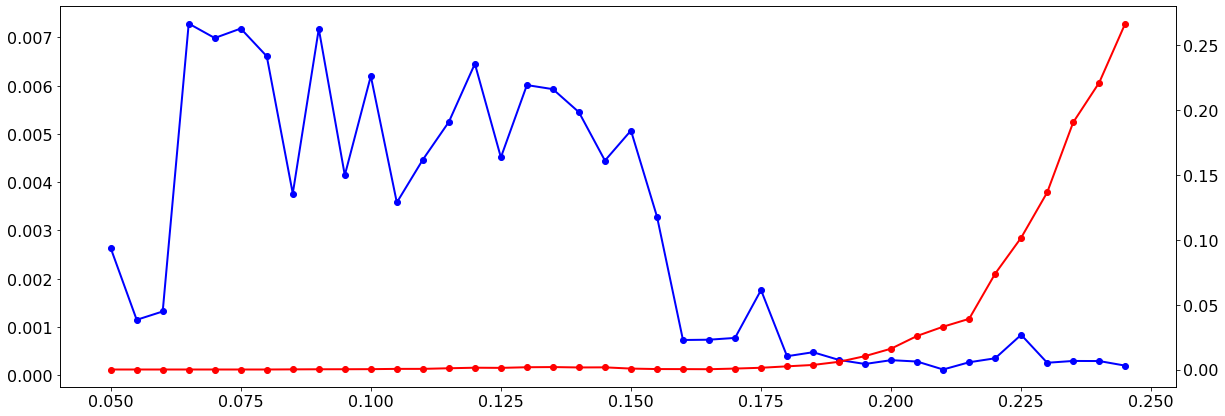

In [136]:
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ax.plot(probs, distances,  marker='o', color='blue')
axt = ax.twinx()
axt.plot(probs, overlaps,  marker='o', color='red')
plt.show()

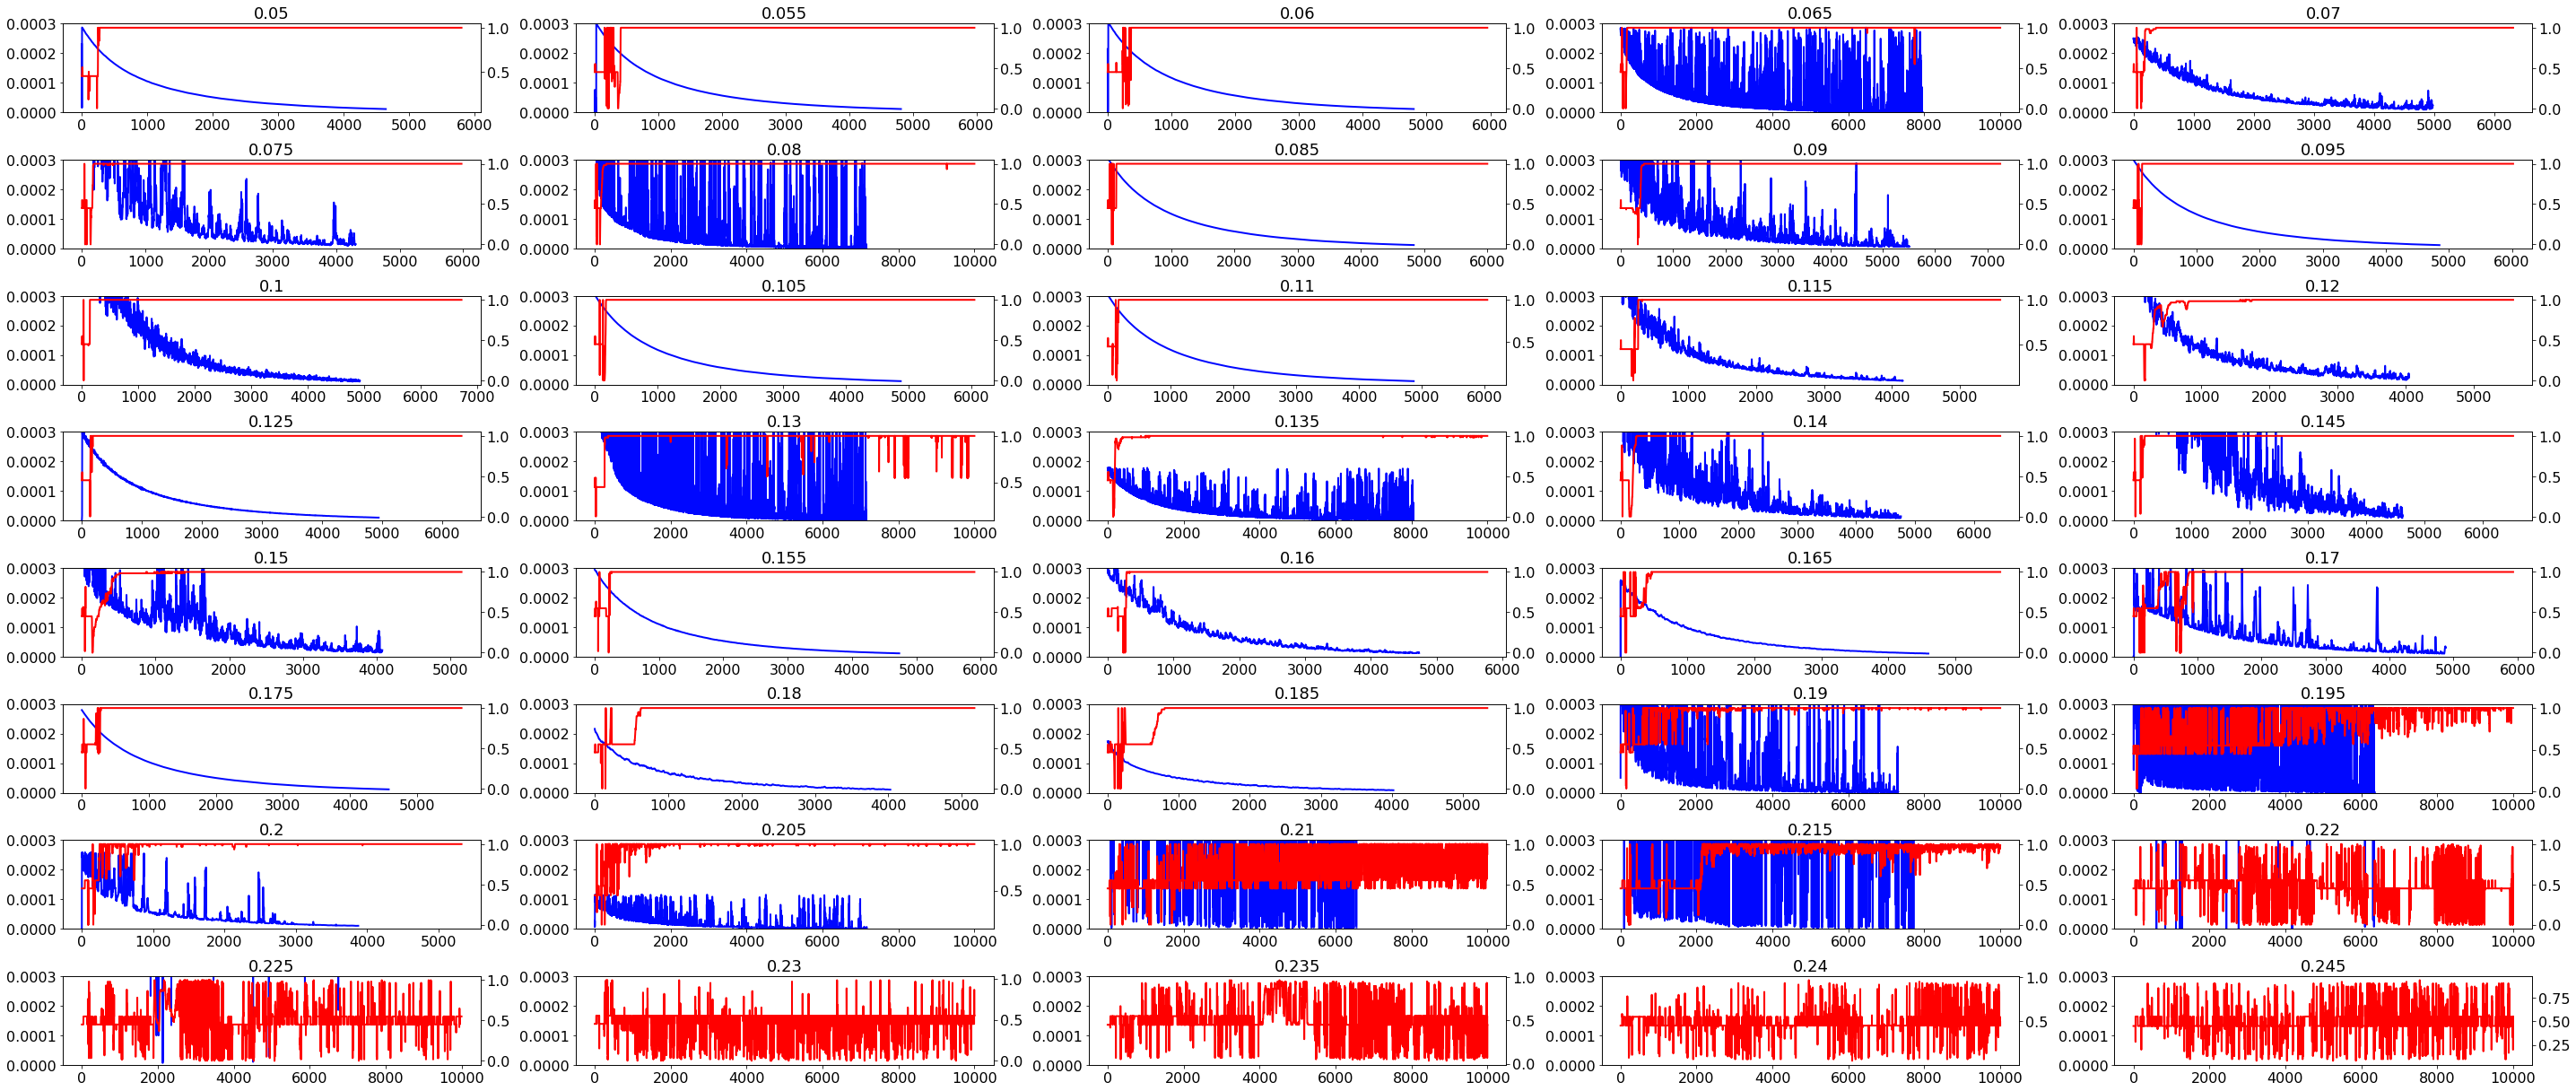

In [155]:
cols = 5
fig, axs = plt.subplots(df.shape[0]//cols, cols, figsize=(40, 17))
j=0
for i, row in df.iterrows():
    p1 = row['graph_dataset']['list_p'][0]
    axs[j//5][j%5].plot(row['risultati']['test_loss'])
    axs[j//5][j%5].set_title(p1)
    axs[j//5][j%5].set_ylim(0,0.0003)
    
    axt = axs[j//5][j%5].twinx()
    axt.plot(row['risultati']['test_accuracy'], color='red')
    j+=1
    
plt.tight_layout()